In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [9]:
df_customer = pd.read_csv("Dim_customer.csv")
df_products = pd.read_csv("Dim_products.csv")
df_sales = pd.read_csv("Fact_sales.csv")

In [10]:
df_sales['order_date'] = pd.to_datetime(df_sales['order_date'], errors='coerce')

In [12]:
df_merged = df_sales.merge(df_customer, on='customer_key', how='left')
df_merged = df_merged.merge(df_products, on='product_key', how='left')

In [13]:
df_merged.head()

,order_number,product_key,customer_key,order_date,ship_date,due_date,sales_amount,quantity,price,customer_id,...,product_id,product_number,product_name,category_id,category,subcategory,maintenance,cost,Product_line,start_date
0,SO43719,17,16613,2011-01-03,2011-01-10,2011-01-15,3578,1,3578,27612,...,312,BK-R93R-48,Road-150 Red- 48,BI_RB,Bikes,Road Bikes,Yes,2171,Road,2011-07-01
1,SO43746,17,5617,2011-01-10,2011-01-17,2011-01-22,3578,1,3578,16616,...,312,BK-R93R-48,Road-150 Red- 48,BI_RB,Bikes,Road Bikes,Yes,2171,Road,2011-07-01
2,SO43782,17,5517,2011-01-18,2011-01-25,2011-01-30,3578,1,3578,16516,...,312,BK-R93R-48,Road-150 Red- 48,BI_RB,Bikes,Road Bikes,Yes,2171,Road,2011-07-01
3,SO43792,17,5624,2011-01-19,2011-01-26,2011-01-31,3578,1,3578,16623,...,312,BK-R93R-48,Road-150 Red- 48,BI_RB,Bikes,Road Bikes,Yes,2171,Road,2011-07-01
4,SO43802,17,594,2011-01-21,2011-01-28,2011-02-02,3578,1,3578,11593,...,312,BK-R93R-48,Road-150 Red- 48,BI_RB,Bikes,Road Bikes,Yes,2171,Road,2011-07-01


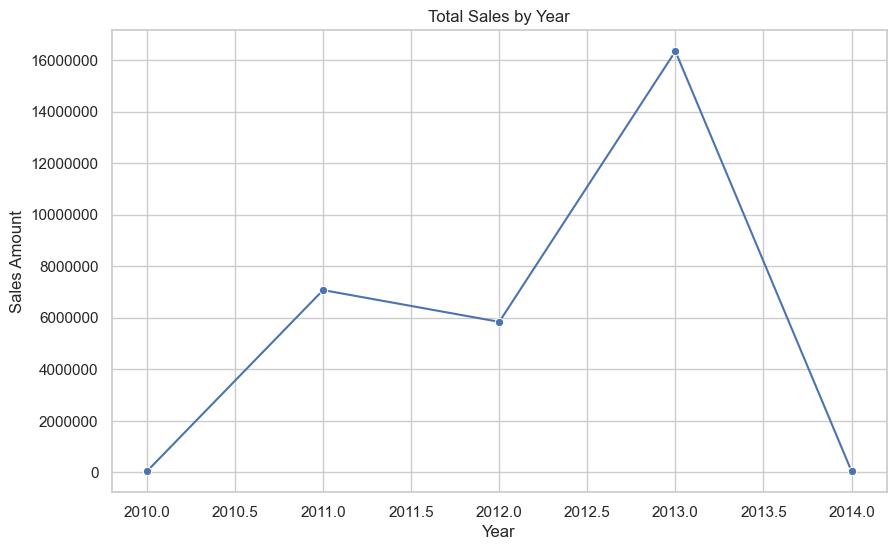

In [28]:
df_merged['order_year'] = df_merged['order_date'].dt.year
sales_by_year = df_merged.groupby('order_year')['sales_amount'].sum().reset_index()

sns.lineplot(data=sales_by_year, x='order_year', y='sales_amount', marker='o')
plt.ticklabel_format(style='plain', axis='y')  
plt.title("Total Sales by Year")
plt.ylabel("Sales Amount")
plt.xlabel("Year")
plt.show()

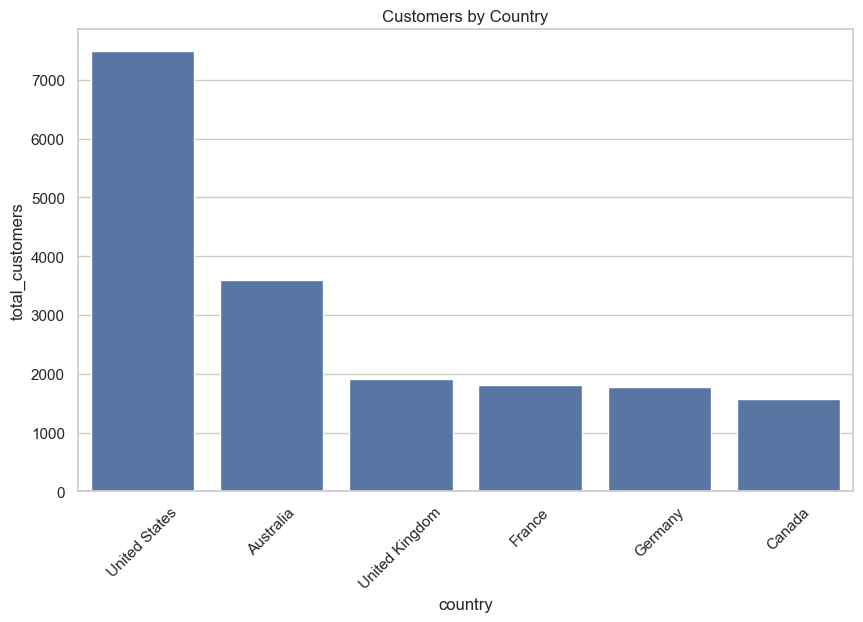

In [15]:
customers_by_country = df_customer['country'].value_counts().reset_index()
customers_by_country.columns = ['country', 'total_customers']

sns.barplot(data=customers_by_country, x='country', y='total_customers')
plt.title("Customers by Country")
plt.xticks(rotation=45)
plt.show()


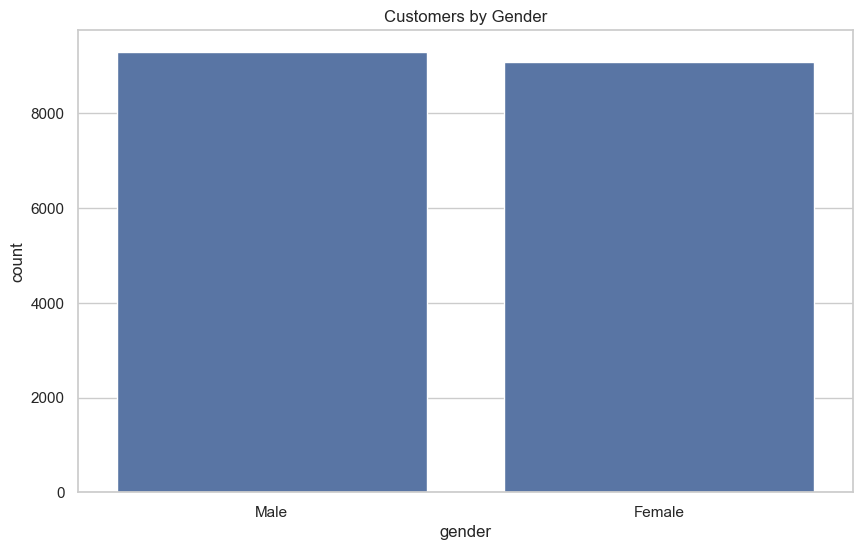

In [16]:
sns.countplot(data=df_customer, x='gender')
plt.title("Customers by Gender")
plt.show()


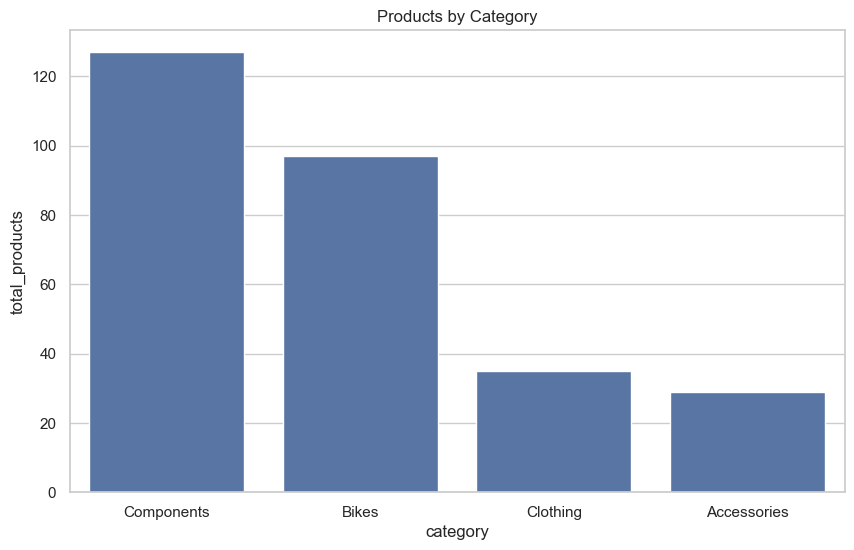

In [17]:
products_by_category = df_products['category'].value_counts().reset_index()
products_by_category.columns = ['category', 'total_products']

sns.barplot(data=products_by_category, x='category', y='total_products')
plt.title("Products by Category")
plt.show()

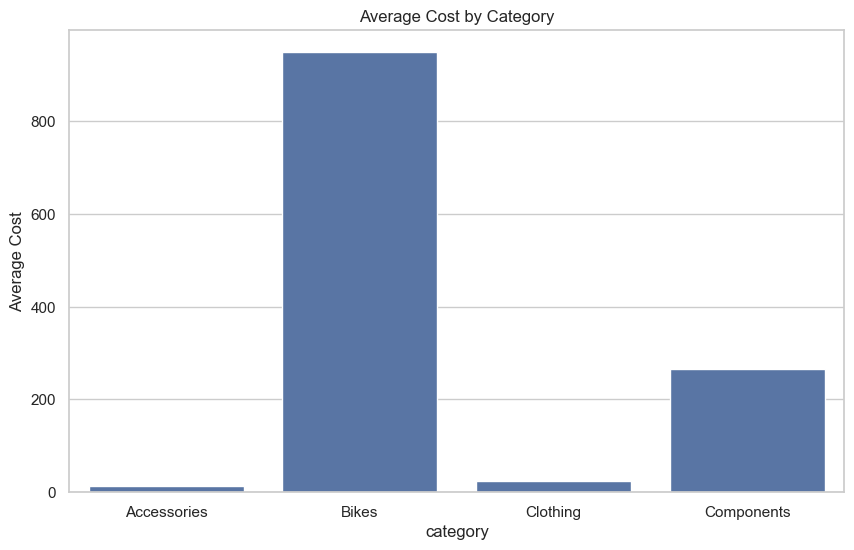

In [18]:
avg_cost_by_category = df_products.groupby('category')['cost'].mean().reset_index()

sns.barplot(data=avg_cost_by_category, x='category', y='cost')
plt.title("Average Cost by Category")
plt.ylabel("Average Cost")
plt.show()

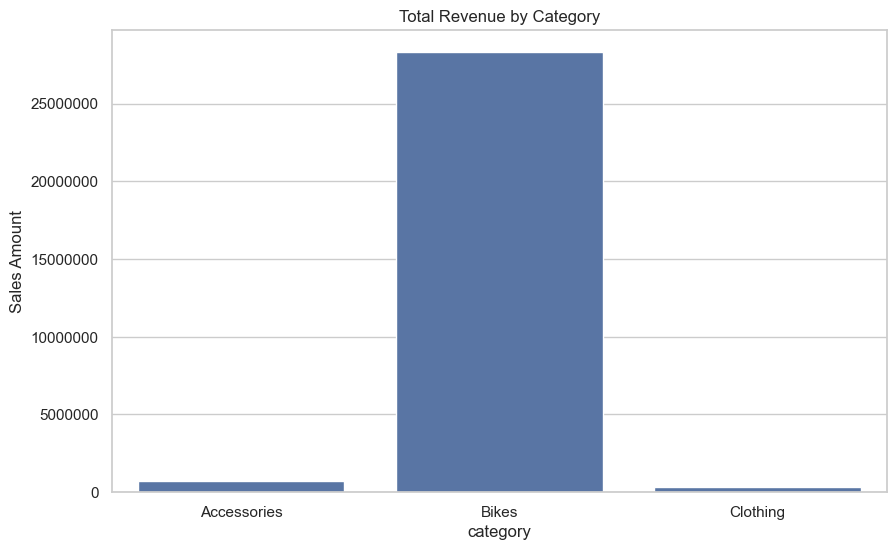

In [27]:
revenue_by_category = df_merged.groupby('category')['sales_amount'].sum().reset_index()

sns.barplot(data=revenue_by_category, x='category', y='sales_amount')
plt.ticklabel_format(style='plain', axis='y')  
plt.title("Total Revenue by Category")
plt.ylabel("Sales Amount")
plt.show()

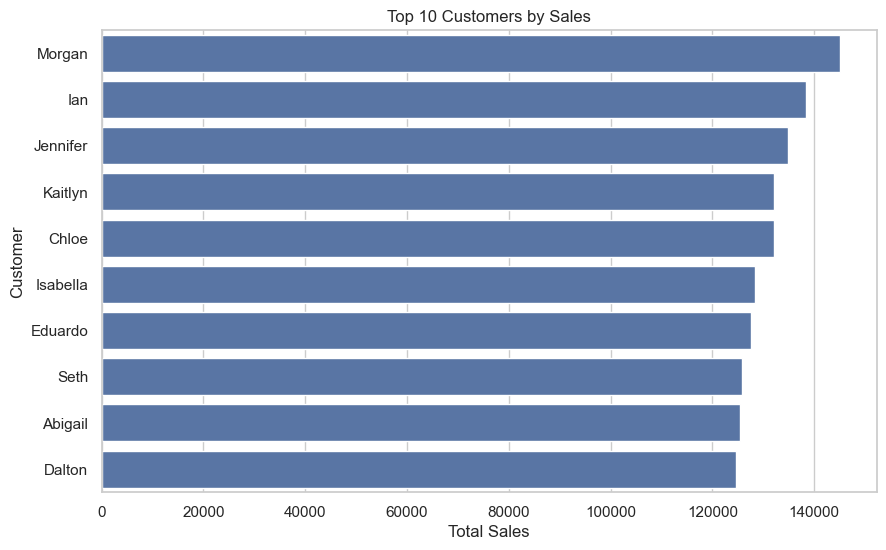

In [20]:
top_customers = df_merged.groupby('first_name')['sales_amount'].sum().nlargest(10).reset_index()

sns.barplot(data=top_customers, x='sales_amount', y='first_name')
plt.title("Top 10 Customers by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Customer")
plt.show()

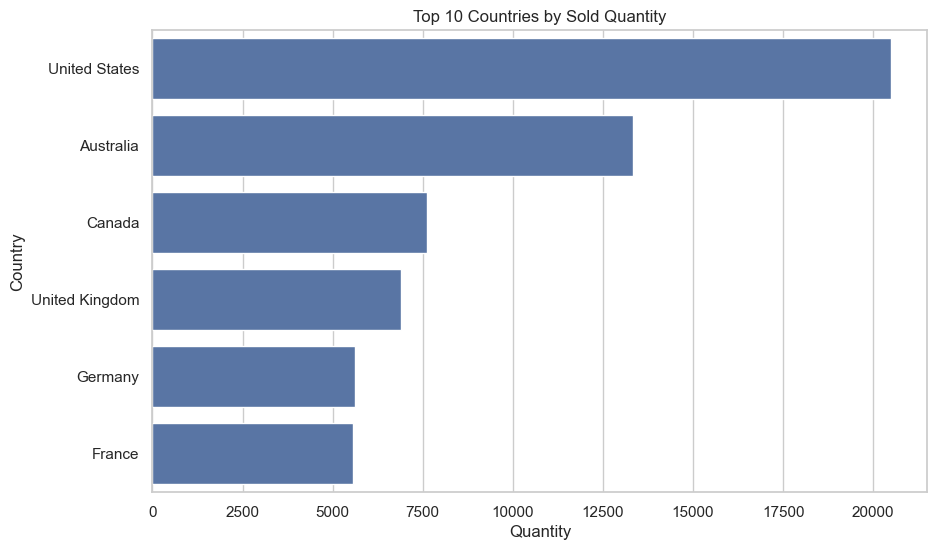

In [21]:
sold_items_by_country = df_merged.groupby('country')['quantity'].sum().nlargest(10).reset_index()

sns.barplot(data=sold_items_by_country, x='quantity', y='country')
plt.title("Top 10 Countries by Sold Quantity")
plt.xlabel("Quantity")
plt.ylabel("Country")
plt.show()

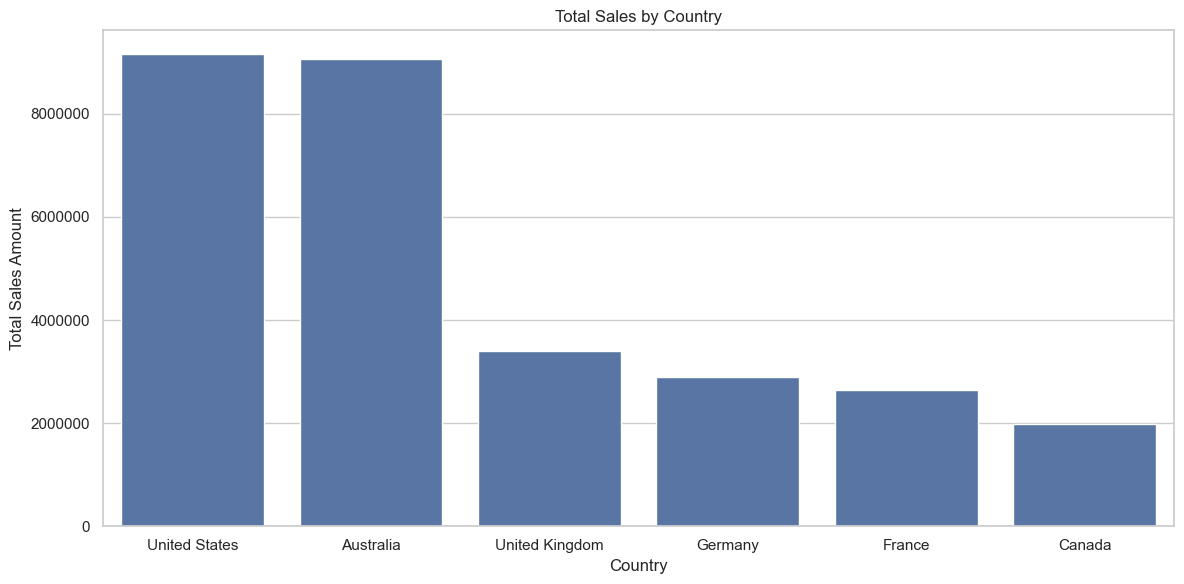

In [24]:
sales_by_country = df_merged.groupby('country')['sales_amount'].sum().reset_index().sort_values(by='sales_amount', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_by_country, x='country', y='sales_amount')
plt.title("Total Sales by Country")
plt.ticklabel_format(style='plain', axis='y')  
plt.xlabel("Country")
plt.ylabel("Total Sales Amount")
plt.tight_layout()
plt.show()
